In [ ]:
!wget -q https://raw.githubusercontent.com/pvesouza/datasets/main/Dataset.csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from numpy.ma.core import correlate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
#data=pd.read_csv('/content/Dataset.csv')
data=pd.read_csv('./Dataset_1.csv')
data.head()

,time,league,pitch,weather,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,dang_attacks_away,attacks_home,attacks_away,possession_home,possession_away,target
0,fh,Israel Youth League,GOOD,GOOD,0,1,2,1,1,1,0,0,62,31,119,72,65%,35%,False
1,lh,Israel Youth League,GOOD,GOOD,1,1,6,2,0,1,0,0,28,14,60,40,64%,36%,True
2,fh,Mali Premiere Division,GOOD,GOOD,0,0,1,3,9,4,12,18,78,57,142,127,51%,49%,False
3,lh,Mali Premiere Division,GOOD,GOOD,0,0,4,3,6,1,10,9,35,30,71,63,50%,50%,False
4,fh,Tanzania Premier Le...,GOOD,GOOD,1,0,7,0,9,4,12,2,83,44,103,87,61%,39%,False


In [4]:
data['corners_home'].value_counts()

2     1280
1     1262
3      993
0      818
4      646
5      412
6      207
7      101
8       45
9       20
10       5
11       4
12       1
13       1
14       1
Name: corners_home, dtype: int64

In [5]:
data['corners_away'].value_counts()

1     1406
2     1256
0     1087
3      920
4      519
5      310
6      168
7       75
8       30
9       18
10       5
13       1
11       1
Name: corners_away, dtype: int64

In [6]:
cpy_dataSet = data.copy()

In [7]:
#Observando as frequências do das classes
cpy_dataSet.drop(columns=['pitch', 'weather', 'league'], inplace=True)
#cpy_dataSet.drop(columns=['pitch', 'weather'], inplace=True)
cpy_dataSet.describe()

,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,dang_attacks_away,attacks_home,attacks_away
count,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000
mean,1.086266,0.933230,2.427019,2.124396,3.500518,2.991373,4.858523,4.328675,41.179434,37.679434,73.042098,70.048482
std,1.247110,1.181038,1.867396,1.786601,2.838142,2.542802,3.590083,3.366097,22.599936,21.264838,32.465153,30.961395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,24.000000,22.000000,47.000000,45.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,4.000000,4.000000,36.000000,33.000000,67.000000,64.000000
75%,2.000000,1.000000,3.000000,3.000000,5.000000,4.000000,7.000000,6.000000,54.000000,49.000000,96.000000,92.000000
max,12.000000,12.000000,14.000000,13.000000,23.000000,22.000000,26.000000,25.000000,162.000000,157.000000,238.000000,209.000000


In [8]:
#descrição mais precisa do dataframe
cpy_dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   time               5796 non-null   object
 1   score_home         5796 non-null   int64 
 2   score_away         5796 non-null   int64 
 3   corners_home       5796 non-null   int64 
 4   corners_away       5796 non-null   int64 
 5   on_target_home     5796 non-null   int64 
 6   on_target_away     5796 non-null   int64 
 7   off_target_home    5796 non-null   int64 
 8   off_target_away    5796 non-null   int64 
 9   dang_attacks_home  5796 non-null   int64 
 10  dang_attacks_away  5796 non-null   int64 
 11  attacks_home       5796 non-null   int64 
 12  attacks_away       5796 non-null   int64 
 13  possession_home    5796 non-null   object
 14  possession_away    5796 non-null   object
 15  target             5796 non-null   bool  
dtypes: bool(1), int64(12), object(3)
memory us

In [9]:
def contains(str, c):
  for i in str:
    if i == '%':
      return True
  return False

In [10]:
#Operacionalizando as colunas possession_home e possession_away para mostrarem a porcentarem em termos de float
p_home = cpy_dataSet['possession_home']
p_away = cpy_dataSet['possession_away']

indexes = []
last_to_drop = 0

for index in range(0, len(p_home)):
  #Convertendo tudo para o tipo string
  value_ = str(p_home[index])
  teste = contains(value_, '%')
  if teste == False:
    if (last_to_drop != index):
      indexes.append(index)
      last_to_drop = index

  value_ = str(p_away[index])
  teste = contains(value_, '%')

  if teste == False:
    if (last_to_drop != index):
      indexes.append(index)
      last_to_drop = index

print(indexes)


[]


In [11]:
#Drops the index of the dataset
newdf = cpy_dataSet
if len(indexes) != 0:
  newdf = cpy_dataSet.drop(indexes, axis=0)

p_home = newdf['possession_home'].values
p_away = newdf['possession_away'].values

p_home_transformed = np.zeros(shape = p_home.shape)
p_away_transformed = np.zeros(shape = p_away.shape)

#print(p_home_transformed.shape)
#print(p_away_transformed.shape)

index = 0
for _str in p_home:
  str_value = _str
  val = ''
  for c in str_value:
    if (c != '%'):
      val = val + c
  p_home_transformed[index] = float(val) / 100
  #print(p_home_transformed[index])
  index += 1

index = 0
for _str in p_away:
  str_value = _str
  val = ''
  for c in str_value:
    if (c != '%'):
      val = val + c
  p_away_transformed[index] = float(val) / 100
  #print(p_away_transformed[index])
  index += 1

print(p_home_transformed[0])
print(p_away_transformed[0])

0.65
0.35


In [12]:
newdf.drop(columns=['possession_home', 'possession_away'], inplace=True)
newdf['Possession_away_t'] = p_away_transformed
newdf['Possession_home_t'] = p_home_transformed

newdf.describe()

,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,dang_attacks_away,attacks_home,attacks_away,Possession_away_t,Possession_home_t
count,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000,5796.000000
mean,1.086266,0.933230,2.427019,2.124396,3.500518,2.991373,4.858523,4.328675,41.179434,37.679434,73.042098,70.048482,0.488194,0.511806
std,1.247110,1.181038,1.867396,1.786601,2.838142,2.542802,3.590083,3.366097,22.599936,21.264838,32.465153,30.961395,0.091339,0.091339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.190000,0.150000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,24.000000,22.000000,47.000000,45.000000,0.430000,0.450000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,4.000000,4.000000,36.000000,33.000000,67.000000,64.000000,0.490000,0.510000
75%,2.000000,1.000000,3.000000,3.000000,5.000000,4.000000,7.000000,6.000000,54.000000,49.000000,96.000000,92.000000,0.550000,0.570000
max,12.000000,12.000000,14.000000,13.000000,23.000000,22.000000,26.000000,25.000000,162.000000,157.000000,238.000000,209.000000,0.850000,0.810000


In [13]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               5796 non-null   object 
 1   score_home         5796 non-null   int64  
 2   score_away         5796 non-null   int64  
 3   corners_home       5796 non-null   int64  
 4   corners_away       5796 non-null   int64  
 5   on_target_home     5796 non-null   int64  
 6   on_target_away     5796 non-null   int64  
 7   off_target_home    5796 non-null   int64  
 8   off_target_away    5796 non-null   int64  
 9   dang_attacks_home  5796 non-null   int64  
 10  dang_attacks_away  5796 non-null   int64  
 11  attacks_home       5796 non-null   int64  
 12  attacks_away       5796 non-null   int64  
 13  target             5796 non-null   bool   
 14  Possession_away_t  5796 non-null   float64
 15  Possession_home_t  5796 non-null   float64
dtypes: bool(1), float64(2), 

In [14]:
newdf['time'].replace({'fh': 1, 'lh': 2}, inplace=True)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               5796 non-null   int64  
 1   score_home         5796 non-null   int64  
 2   score_away         5796 non-null   int64  
 3   corners_home       5796 non-null   int64  
 4   corners_away       5796 non-null   int64  
 5   on_target_home     5796 non-null   int64  
 6   on_target_away     5796 non-null   int64  
 7   off_target_home    5796 non-null   int64  
 8   off_target_away    5796 non-null   int64  
 9   dang_attacks_home  5796 non-null   int64  
 10  dang_attacks_away  5796 non-null   int64  
 11  attacks_home       5796 non-null   int64  
 12  attacks_away       5796 non-null   int64  
 13  target             5796 non-null   bool   
 14  Possession_away_t  5796 non-null   float64
 15  Possession_home_t  5796 non-null   float64
dtypes: bool(1), float64(2), 

In [15]:
#Adicionando a diferença de gols entre os times
score_home = newdf['score_home'].values - newdf['score_away'].values
newdf['diff_scores'] = score_home

#Adicionando a soma dos corners
total_corners = newdf['corners_home'].values + newdf['corners_away'].values
newdf['total_corners'] = total_corners

#Adicionando a soma dos chutes no alvo
total_on_target_kicks = newdf['on_target_home'].values + newdf['on_target_away'].values
newdf['total_on_target_kicks'] = total_on_target_kicks

#Adicionando a diferença de ataques perigosos
diff_dang_attacks = newdf['dang_attacks_home'].values - newdf['dang_attacks_away'].values
newdf['diff_on_dang_attacks'] = diff_dang_attacks

#Adicionando a diferença nos ataques
diff_attacks = newdf['attacks_home'].values - newdf['attacks_away'].values
newdf['diff_on_attacks'] = diff_attacks

#Adicionando a diferença na posse de bola
diff_possession = newdf['Possession_home_t'].values - newdf['Possession_away_t'].values
newdf['diff_on_possession'] = diff_possession

In [16]:
newdf.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_away,target,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession
0,1,0,1,2,1,1,1,0,0,62,...,72,False,0.35,0.65,-1,3,2,31,47,0.30
1,2,1,1,6,2,0,1,0,0,28,...,40,True,0.36,0.64,0,8,1,14,20,0.28
2,1,0,0,1,3,9,4,12,18,78,...,127,False,0.49,0.51,0,4,13,21,15,0.02
3,2,0,0,4,3,6,1,10,9,35,...,63,False,0.50,0.50,0,7,7,5,8,0.00
4,1,1,0,7,0,9,4,12,2,83,...,87,False,0.39,0.61,1,7,13,39,16,0.22


In [17]:
#Normalizandos os dados através do método min-max
X = newdf.drop(columns='target')
#X = newdf.drop(columns=['target', 'corners_home', 'corners_away'])
Y = newdf['target']

In [18]:
X.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_home,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession
0,1,0,1,2,1,1,1,0,0,62,...,119,72,0.35,0.65,-1,3,2,31,47,0.30
1,2,1,1,6,2,0,1,0,0,28,...,60,40,0.36,0.64,0,8,1,14,20,0.28
2,1,0,0,1,3,9,4,12,18,78,...,142,127,0.49,0.51,0,4,13,21,15,0.02
3,2,0,0,4,3,6,1,10,9,35,...,71,63,0.50,0.50,0,7,7,5,8,0.00
4,1,1,0,7,0,9,4,12,2,83,...,103,87,0.39,0.61,1,7,13,39,16,0.22


In [19]:
Y.head()

0    False
1     True
2    False
3    False
4    False
Name: target, dtype: bool

In [20]:
for column in X.columns:
    if column != 'Possession_away_t' and column != 'Possession_home_t' and column != 'diff_on_possession':
        X[column] = X[column]  /  X[column].abs().max()

X_1 = X.values
Y_1 = Y.values

X.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_home,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession
0,0.5,0.000000,0.083333,0.142857,0.076923,0.043478,0.045455,0.000000,0.00,0.382716,...,0.500000,0.344498,0.35,0.65,-0.083333,0.136364,0.052632,0.246032,0.324138,0.30
1,1.0,0.083333,0.083333,0.428571,0.153846,0.000000,0.045455,0.000000,0.00,0.172840,...,0.252101,0.191388,0.36,0.64,0.000000,0.363636,0.026316,0.111111,0.137931,0.28
2,0.5,0.000000,0.000000,0.071429,0.230769,0.391304,0.181818,0.461538,0.72,0.481481,...,0.596639,0.607656,0.49,0.51,0.000000,0.181818,0.342105,0.166667,0.103448,0.02
3,1.0,0.000000,0.000000,0.285714,0.230769,0.260870,0.045455,0.384615,0.36,0.216049,...,0.298319,0.301435,0.50,0.50,0.000000,0.318182,0.184211,0.039683,0.055172,0.00
4,0.5,0.083333,0.000000,0.500000,0.000000,0.391304,0.181818,0.461538,0.08,0.512346,...,0.432773,0.416268,0.39,0.61,0.083333,0.318182,0.342105,0.309524,0.110345,0.22


In [21]:
#Separando os datasets
halfTimeDf = []
lastTimeDf = []

datasetJoined = X.copy()
datasetJoined['target'] = Y

datasetValues = datasetJoined.values

#print(datasetValues[0][0] - 0.5 < 0.0001)

for i in range(0, datasetValues.shape[0]):
  if (datasetValues[i][0] - 0.5) < 0.0001:
    halfTimeDf.append(datasetValues[i])
  else:
    lastTimeDf.append(datasetValues[i])

halfTimeDf_1 = pd.DataFrame(halfTimeDf, columns=datasetJoined.columns)
lastTimeDf_1 = pd.DataFrame(lastTimeDf, columns=datasetJoined.columns)

datasetJoined.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession,target
0,0.5,0.000000,0.083333,0.142857,0.076923,0.043478,0.045455,0.000000,0.00,0.382716,...,0.344498,0.35,0.65,-0.083333,0.136364,0.052632,0.246032,0.324138,0.30,False
1,1.0,0.083333,0.083333,0.428571,0.153846,0.000000,0.045455,0.000000,0.00,0.172840,...,0.191388,0.36,0.64,0.000000,0.363636,0.026316,0.111111,0.137931,0.28,True
2,0.5,0.000000,0.000000,0.071429,0.230769,0.391304,0.181818,0.461538,0.72,0.481481,...,0.607656,0.49,0.51,0.000000,0.181818,0.342105,0.166667,0.103448,0.02,False
3,1.0,0.000000,0.000000,0.285714,0.230769,0.260870,0.045455,0.384615,0.36,0.216049,...,0.301435,0.50,0.50,0.000000,0.318182,0.184211,0.039683,0.055172,0.00,False
4,0.5,0.083333,0.000000,0.500000,0.000000,0.391304,0.181818,0.461538,0.08,0.512346,...,0.416268,0.39,0.61,0.083333,0.318182,0.342105,0.309524,0.110345,0.22,False


In [22]:
halfTimeDf_1.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession,target
0,0.5,0.000000,0.083333,0.142857,0.076923,0.043478,0.045455,0.000000,0.00,0.382716,...,0.344498,0.35,0.65,-0.083333,0.136364,0.052632,0.246032,0.324138,0.30,False
1,0.5,0.000000,0.000000,0.071429,0.230769,0.391304,0.181818,0.461538,0.72,0.481481,...,0.607656,0.49,0.51,0.000000,0.181818,0.342105,0.166667,0.103448,0.02,False
2,0.5,0.083333,0.000000,0.500000,0.000000,0.391304,0.181818,0.461538,0.08,0.512346,...,0.416268,0.39,0.61,0.083333,0.318182,0.342105,0.309524,0.110345,0.22,False
3,0.5,0.000000,0.083333,0.071429,0.153846,0.043478,0.090909,0.038462,0.08,0.395062,...,0.449761,0.51,0.49,-0.083333,0.136364,0.078947,0.142857,0.055172,-0.02,False
4,0.5,0.000000,0.000000,0.071429,0.000000,0.000000,0.318182,0.230769,0.28,0.277778,...,0.617225,0.64,0.36,0.000000,0.045455,0.184211,-0.158730,-0.137931,-0.28,False


In [23]:
lastTimeDf_1.head()

,time,score_home,score_away,corners_home,corners_away,on_target_home,on_target_away,off_target_home,off_target_away,dang_attacks_home,...,attacks_away,Possession_away_t,Possession_home_t,diff_scores,total_corners,total_on_target_kicks,diff_on_dang_attacks,diff_on_attacks,diff_on_possession,target
0,1.0,0.083333,0.083333,0.428571,0.153846,0.000000,0.045455,0.000000,0.00,0.172840,...,0.191388,0.36,0.64,0.000000,0.363636,0.026316,0.111111,0.137931,0.28,True
1,1.0,0.000000,0.000000,0.285714,0.230769,0.260870,0.045455,0.384615,0.36,0.216049,...,0.301435,0.50,0.50,0.000000,0.318182,0.184211,0.039683,0.055172,0.00,False
2,1.0,0.333333,0.000000,0.000000,0.000000,0.217391,0.181818,0.269231,0.00,0.290123,...,0.200957,0.41,0.59,0.333333,0.000000,0.236842,0.206349,0.020690,0.18,False
3,1.0,0.000000,0.083333,0.000000,0.153846,0.000000,0.045455,0.038462,0.00,0.135802,...,0.186603,0.55,0.45,-0.083333,0.090909,0.026316,-0.007937,0.027586,-0.10,False
4,1.0,0.000000,0.166667,0.000000,0.230769,0.000000,0.090909,0.076923,0.08,0.141975,...,0.349282,0.64,0.36,-0.166667,0.136364,0.052632,-0.039683,-0.124138,-0.28,False


In [24]:
#Numero de linhas e colunas do dataframe
dfRow, dfColumns = lastTimeDf_1.shape
print("Rows: ", dfRow)
print("Columns: ", dfColumns)

#Numero de linhas e colunas do dataframe
dfRow, dfColumns = halfTimeDf_1.shape
print("Rows: ", dfRow)
print("Columns: ", dfColumns)

Rows:  2898
Columns:  22
Rows:  2898
Columns:  22


In [25]:
#Visualização da coluna target para identificar estatísticas sobre ela
y_general = Y
y_halfTime = halfTimeDf_1['target']
y_lastTime = lastTimeDf_1['target']

x_general = X
x_halfTime = halfTimeDf_1.drop(columns=['target','time'])
x_lastTime = lastTimeDf_1.drop(columns=['target','time'])

print(y_general.shape)
print(y_halfTime.shape)
print(y_lastTime.shape)

print(x_general.shape)
print(x_halfTime.shape)
print(x_lastTime.shape)

(5796,)
(2898,)
(2898,)
(5796, 21)
(2898, 20)
(2898, 20)


In [26]:
x_halfTime.values[1]

array([0.        , 0.        , 0.07142857, 0.23076923, 0.39130435,
       0.18181818, 0.46153846, 0.72      , 0.48148148, 0.36305732,
       0.59663866, 0.6076555 , 0.49      , 0.51      , 0.        ,
       0.18181818, 0.34210526, 0.16666667, 0.10344828, 0.02      ])

In [27]:
#Separando o novo dataframe em X e Y temos:
#X = newdf[['score_home', 'score_away', 'corners_home','corners_away', 'on_target_home', 'on_target_away', 'off_target_home','off_target_away', 'dang_attacks_home', 'dang_attacks_away','attacks_home', 'attacks_away', 'Label_Weather', 'Label_Pitch', 'Possession_away_t','Possession_home_t']].values
#X = newdf[['score_home', 'score_away', 'corners_home','corners_away', 'on_target_home', 'on_target_away', 'off_target_home','off_target_away', 'dang_attacks_home', 'dang_attacks_away','attacks_home', 'attacks_away', 'Possession_away_t','Possession_home_t', 'diff_scores','total_corners','total_on_target_kicks','diff_on_dang_attacks','diff_on_attacks','diff_on_possession']].values
#X = newdf[['diff_scores','total_corners','total_on_target_kicks','diff_on_dang_attacks','diff_on_attacks','diff_on_possession']].values
X_1 = x_general.values
Y_1 = y_general.values
X_1H = x_halfTime.values
Y_1H = y_halfTime.values
X_1L = x_lastTime.values
Y_1L = y_lastTime.values


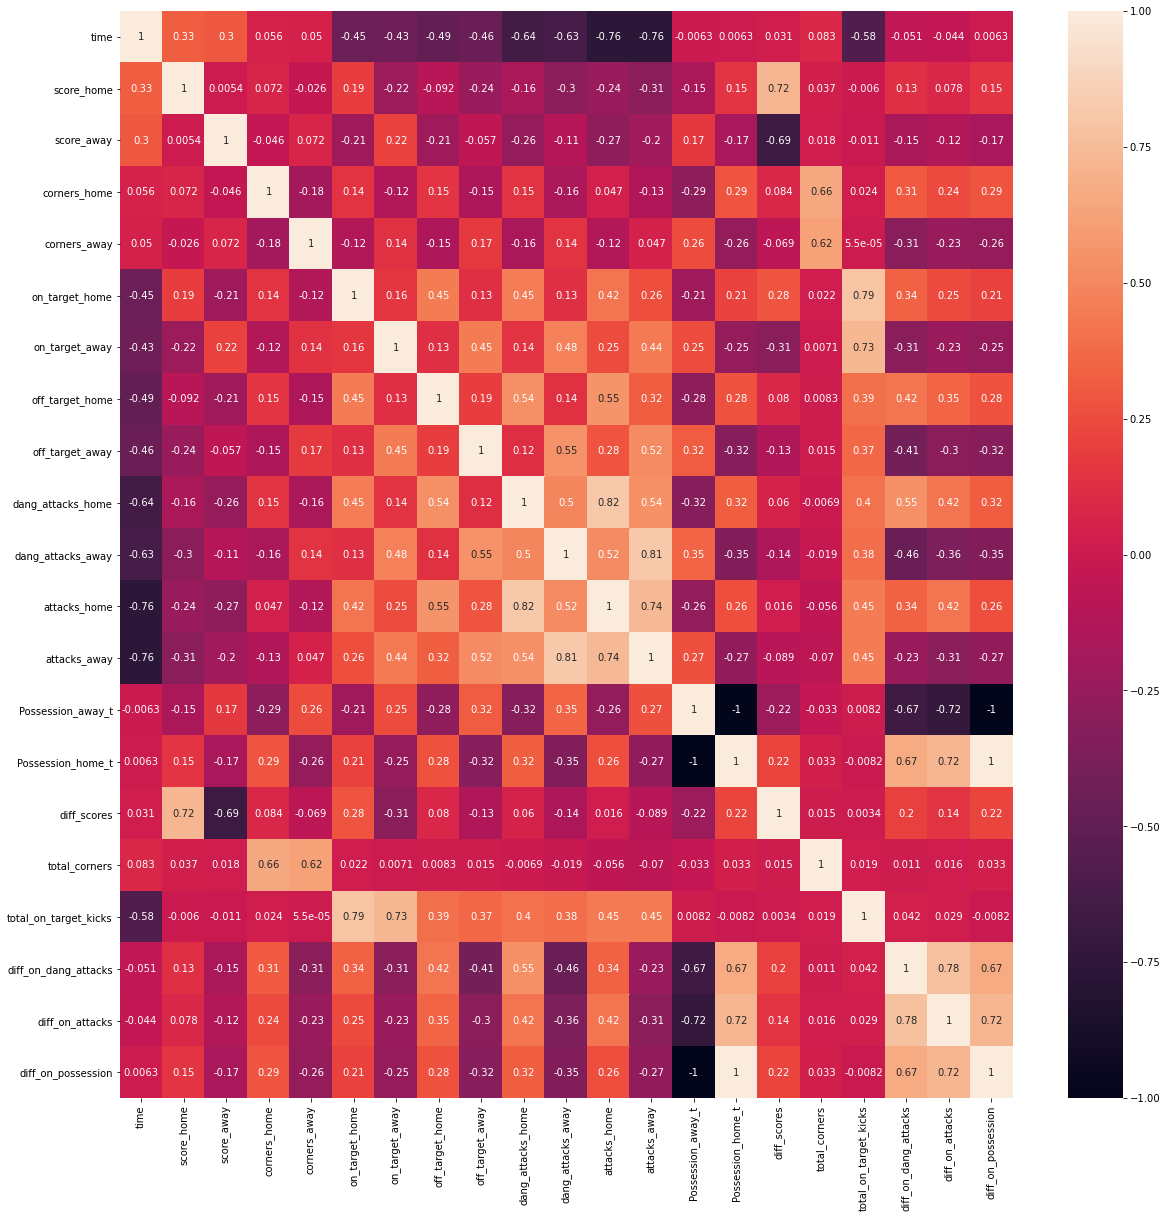

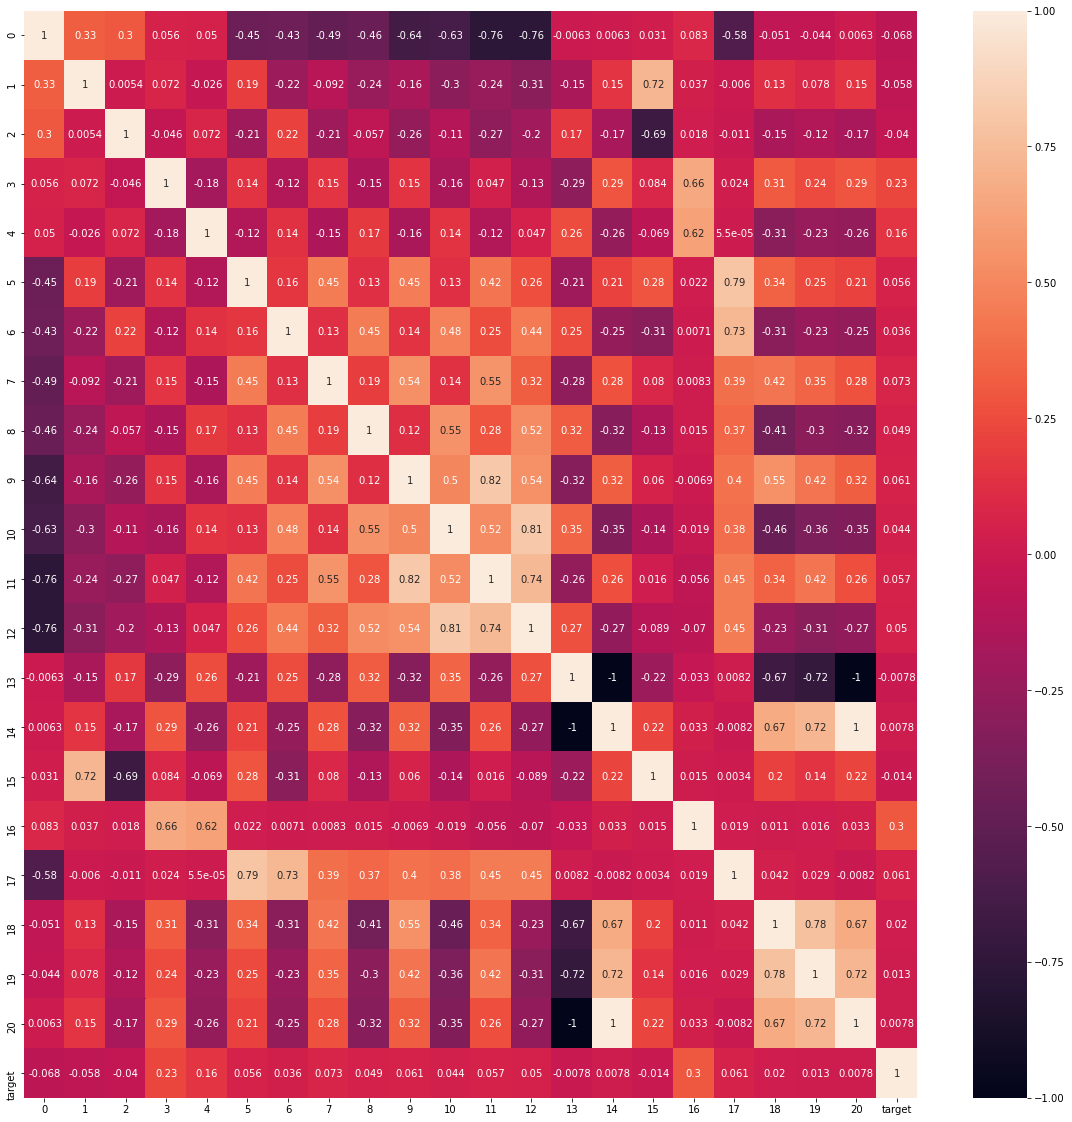

In [28]:

#Imprimindo a matriz de correlação entre as variáveis
correlation_m = x_general.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_m, annot=True)
plt.show()

x_df = pd.DataFrame(X_1)
x_df['target'] = pd.DataFrame(Y_1)

#Imprimindo a matriz de correlação entre as variáveis
correlation_m = x_df.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_m, annot=True)
plt.show()


In [46]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size = 0.3, random_state=10)
X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_1H, Y_1H, test_size = 0.3, random_state=10)
X_L_train, X_L_test, y_L_train, y_L_test = train_test_split(X_1L, Y_1L, test_size = 0.3, random_state=10)

In [47]:
svc = SVC(random_state=10)
# defining parameter range for svm
param_grid = {'C': [0.1, 1, 10,],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# define random search for SVM
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats=10, random_state=10)
search = RandomizedSearchCV(svc, param_grid, n_iter=20, scoring='precision', n_jobs=4, cv=cv, random_state=10)


In [48]:

# execute search
result_svc = search.fit(X_train, y_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc.best_score_)
print('Best Hyperparameters: %s' % result_svc.best_params_)


=========Random Search Results for SVM==========
Best Score: 0.691239457987744
Best Hyperparameters: {'kernel': 'poly', 'gamma': 0.1, 'C': 1}


In [49]:
# IMprimindo o classification report
modelo = result_svc.best_estimator_
print (classification_report(y_test, modelo.predict(X_test)))

print (confusion_matrix(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

       False       0.56      0.91      0.69       899
        True       0.70      0.23      0.35       840

    accuracy                           0.58      1739
   macro avg       0.63      0.57      0.52      1739
weighted avg       0.63      0.58      0.53      1739

[[816  83]
 [644 196]]


In [50]:
# execute search
result_svc_H = search.fit(X_H_train, y_H_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc_H.best_score_)
print('Best Hyperparameters: %s' % result_svc_H.best_params_)

=========Random Search Results for SVM==========
Best Score: 0.6738679559221332
Best Hyperparameters: {'kernel': 'poly', 'gamma': 0.1, 'C': 10}


In [51]:
# IMprimindo o classification report
modelo = result_svc_H.best_estimator_
print (classification_report(y_H_test, modelo.predict(X_H_test)))

print (confusion_matrix(y_H_test, modelo.predict(X_H_test)))

              precision    recall  f1-score   support

       False       0.57      0.69      0.63       412
        True       0.66      0.54      0.59       458

    accuracy                           0.61       870
   macro avg       0.62      0.61      0.61       870
weighted avg       0.62      0.61      0.61       870

[[284 128]
 [212 246]]


In [52]:
# execute search
result_svc_L = search.fit(X_L_train, y_L_train)

# summarize result for SVM
print('=========Random Search Results for SVM==========')
print('Best Score: %s' % result_svc_L.best_score_)
print('Best Hyperparameters: %s' % result_svc_L.best_params_)

=========Random Search Results for SVM==========
Best Score: 0.7473432861428216
Best Hyperparameters: {'kernel': 'poly', 'gamma': 0.1, 'C': 10}


In [37]:
# IMprimindo o classification report
modelo = result_svc_L.best_estimator_
print (classification_report(y_L_test, modelo.predict(X_L_test)))

print (confusion_matrix(y_L_test, modelo.predict(X_L_test)))

              precision    recall  f1-score   support

       False       0.58      0.96      0.72       323
        True       0.70      0.12      0.20       257

    accuracy                           0.59       580
   macro avg       0.64      0.54      0.46       580
weighted avg       0.63      0.59      0.49       580

[[310  13]
 [227  30]]


In [53]:
mlp = MLPClassifier()
# defining parameter range for MLP
layer_details = [(10,),
                 (20,),
                 (30,),
                 (10,10,),
                 (20,20,),
                 (30,30,),
                 (10,10,10,),
                 (20,20,20,),
                 (30,30,30,),
                 (10,10,10,10,),
                 (20,20,20,20,),
                 (30,30,30,30,),
                 (10,10,10,10,10,),
                 (20,20,20,20,20,),
                 (30,30,30,30,30,)]
param_grid = {'activation':['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes':layer_details,
              'solver':['lbfgs', 'sgd', 'adam'],
              'alpha':[1., .1, .01, .001, .0001, .00001],}


# define random search for MLP
search = RandomizedSearchCV(mlp, param_grid, n_iter=40, scoring='precision', n_jobs=4, cv=cv, random_state=10)

# execute search
result_mlp = search.fit(X_train, y_train)

# summarize result for MLP
print('=========Random Search Results for MLP==========')
print('Best Score: %s' % result_mlp.best_score_)
print('Best Hyperparameters: %s' % result_mlp.best_params_)

=========Random Search Results for MLP==========
Best Score: 0.6435086192610943
Best Hyperparameters: {'solver': 'adam', 'hidden_layer_sizes': (10, 10), 'alpha': 1.0, 'activation': 'identity'}


Resultados MLP

In [54]:
# IMprimindo o classification report
modelo = result_mlp.best_estimator_
print (classification_report(y_test, modelo.predict(X_test)))

print (confusion_matrix(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

       False       0.64      0.60      0.62       899
        True       0.60      0.64      0.62       840

    accuracy                           0.62      1739
   macro avg       0.62      0.62      0.62      1739
weighted avg       0.62      0.62      0.62      1739

[[539 360]
 [300 540]]


In [55]:
decisionTree = DecisionTreeClassifier()

# define search space for decision tree
space = dict()
space['criterion'] = ['gini', 'entropy']
space['min_samples_split'] = [2,3,4,5,6,7,8,9]
space['max_depth'] = [3,5,6,7,9,11,13,15,17,19,20,21,22,23,24,25]
space['min_samples_leaf'] = [2,3,4,5,6]

# define random search for decision tree
search = RandomizedSearchCV(decisionTree, space, n_iter=50, scoring='precision', n_jobs=4, cv=cv, random_state=10)

# execute search
result_tree = search.fit(X_train, y_train)

# summarize result for decision tree
print('=========Random Search Results fro TREE==========')
print('Best Score: %s' % result_tree.best_score_)
print('Best Hyperparameters: %s' % result_tree.best_params_)

=========Random Search Results fro TREE==========
Best Score: 0.6133160120875261
Best Hyperparameters: {'min_samples_split': 4, 'min_samples_leaf': 5, 'max_depth': 3, 'criterion': 'entropy'}


In [56]:
# Imprimindo o classification report
modelo = result_tree.best_estimator_
print (classification_report(y_test, modelo.predict(X_test)))
print (confusion_matrix(y_test, modelo.predict(X_test)))

              precision    recall  f1-score   support

       False       0.68      0.47      0.56       899
        True       0.57      0.77      0.66       840

    accuracy                           0.61      1739
   macro avg       0.63      0.62      0.61      1739
weighted avg       0.63      0.61      0.60      1739

[[422 477]
 [196 644]]


#Comitê com voto majoritário

In [57]:
def majoritarian_vote(pred_1, pred_2, pred_3):
  prediction = []
  for index, ans in enumerate(pred_1):
    sumFalse = 0
    sumTrue = 0
    answer = True

    if ans == True:
      sumTrue += 1
    else:
      sumFalse += 1

    if pred_2[index] == True:
      sumTrue += 1
    else:
      sumFalse += 1

    if pred_3[index] == True:
      sumTrue += 1
    else:
      sumFalse += 1

    if sumFalse > sumTrue:
      answer = False

    prediction.append(answer)

  return prediction

In [65]:
tree_vote = result_tree.best_estimator_.predict(X_test)
mlp_vote = result_mlp.best_estimator_.predict(X_test)
svm_vote = result_svc.best_estimator_.predict(X_test)
answers = majoritarian_vote(tree_vote, mlp_vote, svm_vote)   

ValueError: X.shape[1] = 21 should be equal to 20, the number of features at training time

In [66]:
# Imprimindo o classification report
print (classification_report(y_test, answers))
print (confusion_matrix(y_test, answers))

NameError: name 'answers' is not defined